# A. Install and Import Dependencies

In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
## !cd yolov5 && pip install -r reqirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# B. Load the Model

In [5]:
## website : torch hub

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/yash/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-5 Python-3.10.13 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# C. Make Some Initial Detection

In [21]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [9]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 2630.7ms pre-process, 90.3ms inference, 1.5ms NMS per image at shape (1, 3, 384, 640)


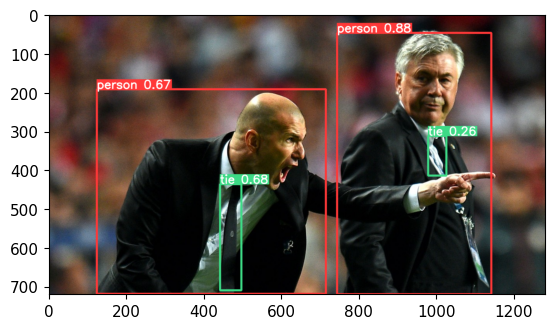

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.xyxy

[tensor([[7.43290e+02, 4.83436e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

# D. Real Time Detection

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# E. Image Collection

## 1. Import Dependencies

In [1]:
# Import opencv
import cv2 

# Import uuid
import uuid

# Import Operating System
import os

# Import time
import time

## 2. Define Images to Collect

In [2]:
labels = ['awake', 'drowsy']
number_imgs = 20

## 3. Setup Folders

In [3]:
IMAGES_PATH = os.path.join('data', 'images')

In [4]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}

## 4. Capture Images

In [5]:
# loop through lebels
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # loop through image range
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))

        # webcam feed
        ret, frame = cap.read()

        # naming out image path
        imgname = os.path.join(IMAGES_PATH,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))

        # write out images to file
        cv2.imwrite(imgname, frame)

        # rendor to the screen
        cv2.imshow('frame', frame)

        # 3 second delay between captures
        time.sleep(3)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

## 5. Image Labelling

In [2]:
!pip install --upgrade pyqt5 lxml

In [3]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [2]:
if os.name == 'posix':
    !cd labelImg &&  make qt5py3
if os.name =='nt':
    !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

pyrcc5 -o libs/resources.py resources.qrc


In [3]:
LABELIMG_PATH = os.path.join('data', 'labels')
if not os.path.exists(LABELIMG_PATH):
    !mkdir -p {LABELIMG_PATH}

In [ ]:
!cd labelImg && python labelImg.py
# change the save dir to labels
# save the label image in yolo

In [9]:
!cd yolov5 && python train.py --img 320  --batch 16 --epochs 100 --data dataset.yaml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.13 torch-2.2.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b

# F. Load the custom Model

## Testing the Model with folder's images

In [7]:
!cd yolov5 && python detect.py --weights runs/train/exp/weights/best.pt --img 320 --conf 0.25 --source runs/train/exp/test_images

detect: weights=['runs/train/exp/weights/best.pt'], source=runs/train/exp/test_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.13 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
image 1/6 /Users/yash/Desktop/Drowsiness/yolov5/runs/train/exp/test_images/awake.6cccfd9a-0c54-11ef-bb9f-be91f5bcaf0b.jpg: 192x320 1 awake, 24.0ms
image 2/6 /Users/yash/Desktop/Drowsiness/yolov5/runs/train/exp/test_images/awake.852ff798-0c4a-11ef-babd-be91f5bcaf0b.jpg: 192x320 1 awake, 29.3ms
image 3/6 /Users/yash/Desktop/Drowsiness/yolov5/runs/train

## Testing the Model with individual image

### Loading the Custom Model for Image or Real-Time Testing

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom' , path='yolov5/runs/train/exp/weights/best.pt', force_reload= True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/yash/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-5-9 Python-3.10.13 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [15]:
img = os.path.join('data', 'images', 'awake.6ea0bcf6-0c54-11ef-bb9f-be91f5bcaf0b.jpg')

In [16]:
results = model(img)
results.print()

image 1/1: 720x1280 1 awake
Speed: 18.6ms pre-process, 94.9ms inference, 1.9ms NMS per image at shape (1, 3, 384, 640)


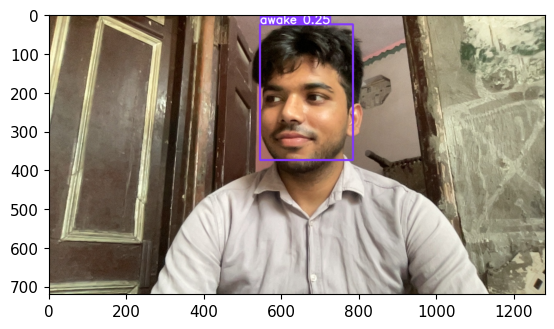

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:
img = os.path.join('data', 'images', 'drowsy.7e6ffb2e-0c54-11ef-bb9f-be91f5bcaf0b.jpg')

In [19]:
results = model(img)
results.print()

image 1/1: 720x1280 1 drowsy
Speed: 17.9ms pre-process, 85.7ms inference, 0.6ms NMS per image at shape (1, 3, 384, 640)


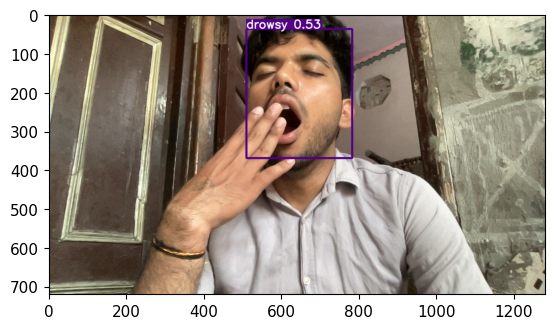

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Go to step D. Real Time Detection

# G. Convert the Model into tflite Model

In [7]:
# Convert weights to fp16 TFLite model
!cd yolov5 && python export.py --weights runs/train/exp/weights/best.pt --include tflite --img 320

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[320], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.13 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 6300, 22) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0...

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 

## Testing the Model with tflite Model

In [8]:
#After running the above command, you will have best-fp16.tflite in runs\train\exp\weights folder

!cd yolov5 && python detect.py --weights runs/train/exp/weights/best-fp16.tflite --img 320 --conf 0.25 --source runs/train/exp/test_images

detect: weights=['runs/train/exp/weights/best-fp16.tflite'], source=runs/train/exp/test_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.13 torch-2.2.2 CPU

Loading runs/train/exp/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/6 /Users/yash/Desktop/Drowsiness/yolov5/runs/train/exp/test_images/awake.6cccfd9a-0c54-11ef-bb9f-be91f5bcaf0b.jpg: 320x320 1 cat, 115.6ms
image 2/6 /Users/yash/Desktop/Drowsiness/yolov5/runs/train/exp/test_images/awake.852ff798-0c4a-11ef-babd-be91f5bcaf0b.jpg: 320x320 1 cat, 114.6ms
imag